In [1]:
from qiskit import *
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

/Users/natasha.santoso/Library/Python/3.8/lib/python/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/Users/natasha.santoso/Library/Python/3.8/lib/python/site-packages/qiskit/ml/__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')


/Users/natasha.santoso/Library/Python/3.8/lib/python/site-packages/qiskit/ml/datasets/ad_hoc.py:79: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  basis = aqua_globals.random.random((2 ** n, 2 ** n)) + \


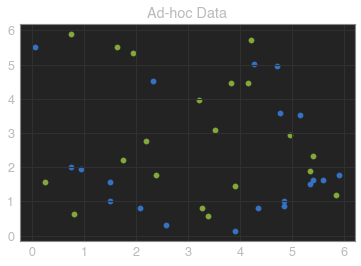

{'A': 0, 'B': 1}


In [3]:
feature_dim = 2
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shot = 10000

sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size = training_dataset_size, 
    test_size = testing_dataset_size, 
    gap = 0.3,
    n = feature_dim,
    plot_data=True)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [5]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, 
                                   shots = shot, 
                                   seed_simulator=random_seed, 
                                   seed_transpiler=random_seed)
result = svm.run(quantum_instance)

MissingOptionalLibraryError: "The 'CVXPY' library is required to use 'optimize_svm'. You can install it with 'pip install 'qiskit-aqua[cvx]''.  No module named 'cvxpy'."